# 프로야구 연봉 데이터셋의 기본 정보 구하기

In [33]:
# -*- coding: utf-8 -*-
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
# Data Source : http://www.statiz.co.kr/
picher_file_path = './data/picher_stats_2017.csv'
picher = pd.read_csv(picher_file_path)
# batter_file_path = './data/picher_stats_2017.csv'
# batter = pd.read_csv(batter_file_path)

picher.columns
picher.shape
picher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [35]:
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

<AxesSubplot:>

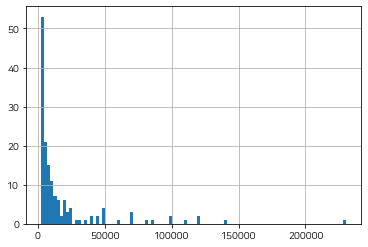

In [36]:
picher['연봉(2018)'].hist(bins=100)

<AxesSubplot:>

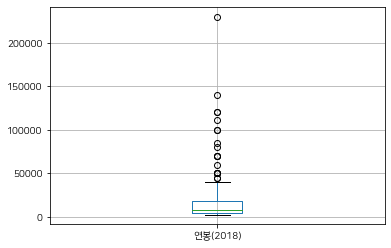

In [37]:
picher.boxplot(column=['연봉(2018)'])

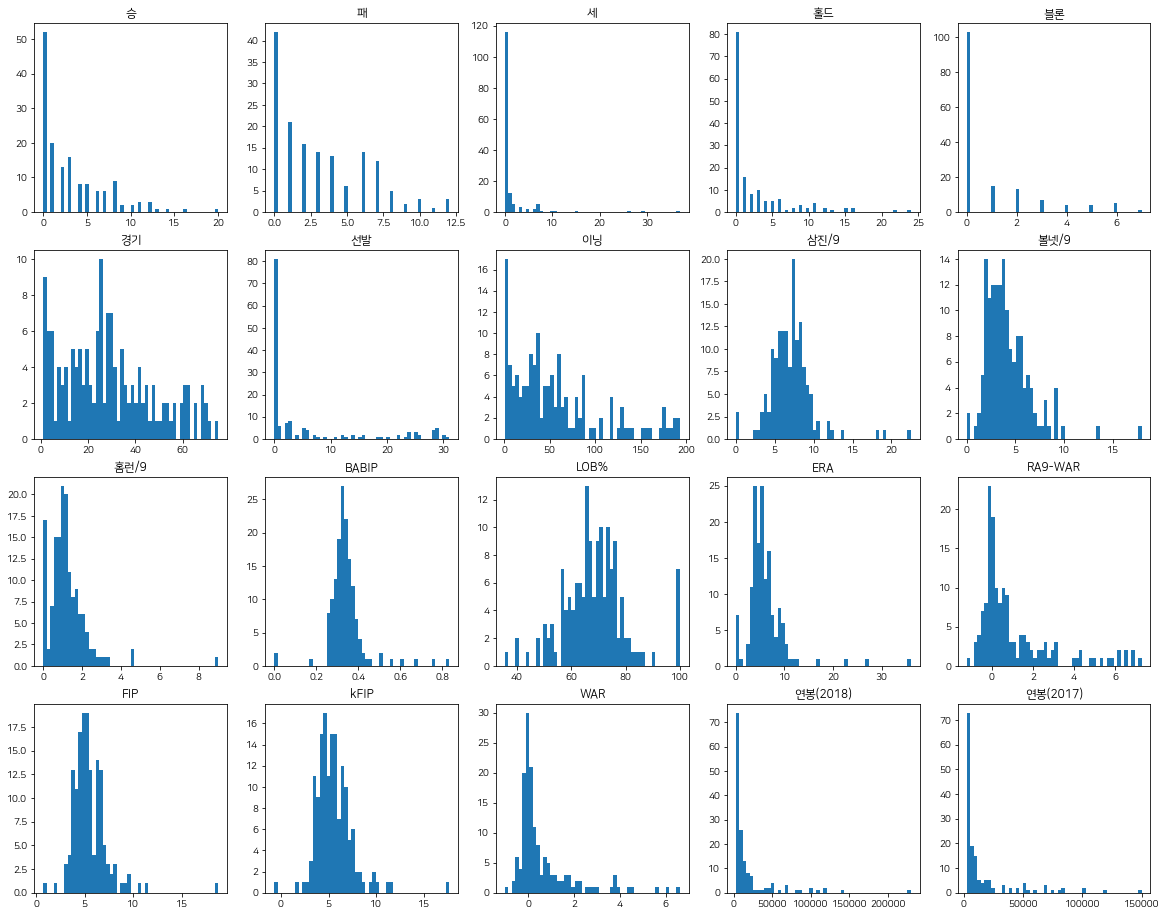

In [38]:
%matplotlib inline
picher_features_df = picher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9','홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2018)', '연봉(2017)']]

# 피처 각각에 대한 히스토그램을 출력한다.
def plot_hist_each_column(df):
    plt.rc('font', family='NanumSquareRound')  # 컴퓨터에 Malgun Gothic가 없어 있는 폰트 사용.
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure(1)
    # df의 열 개수 만큼의 subplot을 출력합니다.
    for i in range(len(df.columns)):
        ax = fig.add_subplot(4, 5, i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()
    
plot_hist_each_column(picher_features_df)

In [63]:
#피처 각각에 대한 스케일링을 수행하는 함수를 정의
def standard_scaling(df, scale_columns):
    temp_df = df.copy()
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        temp_df[col] = temp_df[col].apply(lambda x: (x-series_mean)/series_std)
    return temp_df

# 피처 각각에 대한 스케일링을 수행
# scale_columns = ['승', '패', '세', '홀드', '블론', '경기', 
#                  '선발', '이닝', '삼진/9', '볼넷/9','홈런/9', 
#                  'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 
#                  'kFIP', 'WAR', '연봉(2018)', '연봉(2017)']

scale_columns = ['승', '패', '세', '홀드', '블론', '경기', 
                 '선발', '이닝', '삼진/9', '볼넷/9','홈런/9', 
                 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 
                 'kFIP', 'WAR', '연봉(2017)']

picher_df = standard_scaling(picher, scale_columns)
picher_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


In [40]:
picher_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


In [41]:
pd.options.mode.chained_assignment = None
picher_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


In [64]:
picher_df = picher_df.rename(columns={'연봉(2018)': 'y'})
picher_df.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


In [65]:
team_encoding = pd.get_dummies(picher_df['팀명'])
picher_df = picher_df.drop('팀명', axis=1)
picher_df = picher_df.join(team_encoding)
picher_df.head()
picher_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       152 non-null    object 
 1   승         152 non-null    float64
 2   패         152 non-null    float64
 3   세         152 non-null    float64
 4   홀드        152 non-null    float64
 5   블론        152 non-null    float64
 6   경기        152 non-null    float64
 7   선발        152 non-null    float64
 8   이닝        152 non-null    float64
 9   삼진/9      152 non-null    float64
 10  볼넷/9      152 non-null    float64
 11  홈런/9      152 non-null    float64
 12  BABIP     152 non-null    float64
 13  LOB%      152 non-null    float64
 14  ERA       152 non-null    float64
 15  RA9-WAR   152 non-null    float64
 16  FIP       152 non-null    float64
 17  kFIP      152 non-null    float64
 18  WAR       152 non-null    float64
 19  y         152 non-null    int64  
 20  연봉(2017)  152 non-null    float6

In [17]:
X = picher_df[picher_df.columns.difference(['선수명','y'])]
X.shape

(152, 28)

In [18]:
y = picher_df['y'] # 1차원 시리즈 객체
y

0      3.912893
1      3.266495
2      6.821679
3      2.620098
4      2.975617
         ...   
147   -0.382416
148   -0.369488
149   -0.288689
150   -0.482608
151   -0.482608
Name: y, Length: 152, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18) # 8대 2의 비율

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(121, 28) (31, 28)
(121,) (31,)


In [23]:
X_train.head()

,BABIP,ERA,FIP,KIA,KT,LG,LOB%,NC,RA9-WAR,SK,...,삼진/9,선발,세,승,연봉(2017),이닝,패,한화,홀드,홈런/9
121,-0.286638,0.111348,0.439945,0,0,0,-0.502349,0,-0.519013,0,...,-1.212924,-0.009447,-0.098502,-0.827554,1.137674,-0.394729,0.268963,1,-0.585705,-0.245739
58,-0.432729,-0.409455,-0.206752,0,0,0,0.248195,0,0.050492,0,...,-0.236814,-0.624825,-0.306452,1.243035,-0.443386,0.181839,-0.689219,0,0.743059,0.009897
54,0.601148,0.087348,-0.473982,1,0,0,-0.510976,0,-0.470198,0,...,-0.282791,-0.419699,-0.306452,-0.568731,-0.299653,0.040679,-0.689219,0,-0.585705,-0.442382
81,-0.163022,-0.073453,-0.228130,0,0,0,-0.571365,0,-0.383416,0,...,-0.703649,-0.624825,-0.306452,-0.309907,-0.219802,-0.611439,-1.008613,0,0.300137,-0.196578
151,-0.320351,0.389749,1.118709,0,1,0,-0.278049,0,-0.942073,0,...,-0.449012,0.811058,-0.306452,0.207740,-0.539208,0.478075,0.268963,0,-0.585705,0.776804


In [24]:
X_test.head()

,BABIP,ERA,FIP,KIA,KT,LG,LOB%,NC,RA9-WAR,SK,...,삼진/9,선발,세,승,연봉(2017),이닝,패,한화,홀드,홈런/9
118,-0.016931,-0.611056,0.386499,0,1,0,1.404205,0,-0.410536,0,...,-0.548038,-0.624825,-0.306452,-0.827554,-0.499282,-0.774469,-1.008613,0,-0.364245,0.776804
0,0.016783,-0.587056,-0.971030,0,0,0,0.446615,0,3.174630,1,...,0.672099,2.452068,-0.306452,3.313623,2.734705,2.645175,1.227145,0,-0.585705,-0.442382
4,-0.196735,-0.539055,-0.612941,0,0,0,0.481122,0,2.751570,0,...,0.155751,2.452068,-0.306452,2.537153,2.734705,2.587518,1.227145,0,-0.585705,-0.294900
33,-0.140546,-0.198254,-0.025035,0,0,0,0.308584,0,0.636268,0,...,-0.006934,1.221311,-0.306452,1.243035,0.059679,1.233578,1.227145,1,-0.142784,0.226204
65,0.106685,-0.371055,-0.554151,0,0,1,0.524257,0,-0.318330,0,...,0.321973,-0.624825,-0.306452,-0.827554,-0.551186,-0.615416,-1.008613,0,-0.364245,-0.511207


In [25]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
print(lr.coef_, lr.intercept_)

[-0.03640926 -0.11371669 -1.39092923  0.12144945  0.19505075 -0.0269369
 -0.03235007 -0.07772183 -0.16900717 -0.0181081   0.51273654  1.22249958
 -0.166884   -0.20395124  0.00637971  0.12046328 -0.00737062 -0.0755208
  0.09358166 -0.33887087  0.03562328  0.19518496  0.66710749  0.20273266
 -0.03687689  0.07935896  0.015927    0.28465586] -0.009699789915629722


In [29]:
from sklearn import linear_model

lr2 = linear_model.LinearRegression()
lr2.fit(X_train, y_train)

LinearRegression()

In [66]:
# 희귀 분석 모델을 평가
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
model = lr.fit(X_train, y_train)

print(lr.coef_, lr.intercept_)

[-0.03640926 -0.11371669 -1.39092923  0.12144945  0.19505075 -0.0269369
 -0.03235007 -0.07772183 -0.16900717 -0.0181081   0.51273654  1.22249958
 -0.166884   -0.20395124  0.00637971  0.12046328 -0.00737062 -0.0755208
  0.09358166 -0.33887087  0.03562328  0.19518496  0.66710749  0.20273266
 -0.03687689  0.07935896  0.015927    0.28465586] -0.009699789915629722


In [69]:
print('R2=')
print(model.score(X_train, y_train))
print(lr.score(X_test, y_test))

R2=
0.9234913980835645
0.8941235791692834


In [71]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print('RMSE=')
print(sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print(sqrt(mean_squared_error(y_test, lr.predict(X_test))))

RMSE=
0.2748758476295827
0.3277441558796582


In [72]:
!pip install statsmodels

     |████████████████████████████████| 9.5 MB 9.7 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 45.8 MB/s eta 0:00:01


In [73]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     41.58
Date:                Thu, 07 Oct 2021   Prob (F-statistic):           1.01e-40
Time:                        18:00:40   Log-Likelihood:                -15.428
No. Observations:                 121   AIC:                             86.86
Df Residuals:                      93   BIC:                             165.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0087      0.027     -0.326      0.745      -0.062       0.044
BABIP         -0.0364      0.048     -0.763      0.448      -0.131       0.058
ERA           -0.1137      0.133     -0.858      0.393      -0.377       0.150
FIP           -1.3909      3.296     -0.422      0.674      -7.936       5.154
KIA            0.1205      0.100      1.209      0.230      -0.077       0.318
KT             0.1941      0.097      1.993      0.049       0.001       0.387
LG            -0.0279      0.086     -0.326      0.746      -0.198       0.142
LOB%          -0.0324      0.069     -0.469      0.640      -0.169       0.105
NC            -0.0787      0.095     -0.825      0.412      -0.268       0.111
RA9-WAR       -0.1690      0.114     -1.486      0.141      -0.395       0.057
SK            -0.0191      0.088     -0.217      0.829      -0.194       0.155
WAR            0.5127      0.114      4.481      0.000       0.285       0.740
kFIP           1.2225      2.814      0.434      0.665      -4.367       6.812
경기            -0.1669      0.106     -1.571      0.120      -0.378       0.044
두산            -0.2049      0.096     -2.136      0.035      -0.395      -0.014
롯데             0.0054      0.094      0.057      0.954      -0.182       0.193
볼넷/9           0.1205      0.206      0.584      0.561      -0.289       0.530
블론            -0.0074      0.054     -0.136      0.892      -0.115       0.101
삼성            -0.0765      0.082     -0.931      0.354      -0.240       0.087
삼진/9           0.0936      0.271      0.345      0.731      -0.445       0.632
선발            -0.3389      0.182     -1.864      0.066      -0.700       0.022
세              0.0356      0.053      0.670      0.504      -0.070       0.141
승              0.1952      0.084      2.317      0.023       0.028       0.362
연봉(2017)       0.6671      0.044     14.999      0.000       0.579       0.755
이닝             0.2027      0.225      0.903      0.369      -0.243       0.649
패             -0.0369      0.072     -0.510      0.611      -0.180       0.107
한화             0.0784      0.084      0.929      0.355      -0.089       0.246
홀드             0.0159      0.053      0.301      0.764      -0.089       0.121
홈런/9           0.2847      0.570      0.500      0.618      -0.847       1.416
==============================================================================
Omnibus:                       29.871   Durbin-Watson:                   2.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.408
Skew:                           0.319   Prob(JB):                     1.91e-59
Kurtosis:                      10.296   Cond. No.                     3.68e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

[Text(0, 0, 'const'),
 Text(1, 0, 'BABIP'),
 Text(2, 0, 'ERA'),
 Text(3, 0, 'FIP'),
 Text(4, 0, 'KIA'),
 Text(5, 0, 'KT'),
 Text(6, 0, 'LG'),
 Text(7, 0, 'LOB%'),
 Text(8, 0, 'NC'),
 Text(9, 0, 'RA9-WAR'),
 Text(10, 0, 'SK'),
 Text(11, 0, 'WAR'),
 Text(12, 0, 'kFIP'),
 Text(13, 0, '경기'),
 Text(14, 0, '두산'),
 Text(15, 0, '롯데'),
 Text(16, 0, '볼넷/9'),
 Text(17, 0, '블론'),
 Text(18, 0, '삼성'),
 Text(19, 0, '삼진/9'),
 Text(20, 0, '선발'),
 Text(21, 0, '세'),
 Text(22, 0, '승'),
 Text(23, 0, '연봉(2017)'),
 Text(24, 0, '이닝'),
 Text(25, 0, '패'),
 Text(26, 0, '한화'),
 Text(27, 0, '홀드'),
 Text(28, 0, '홈런/9')]

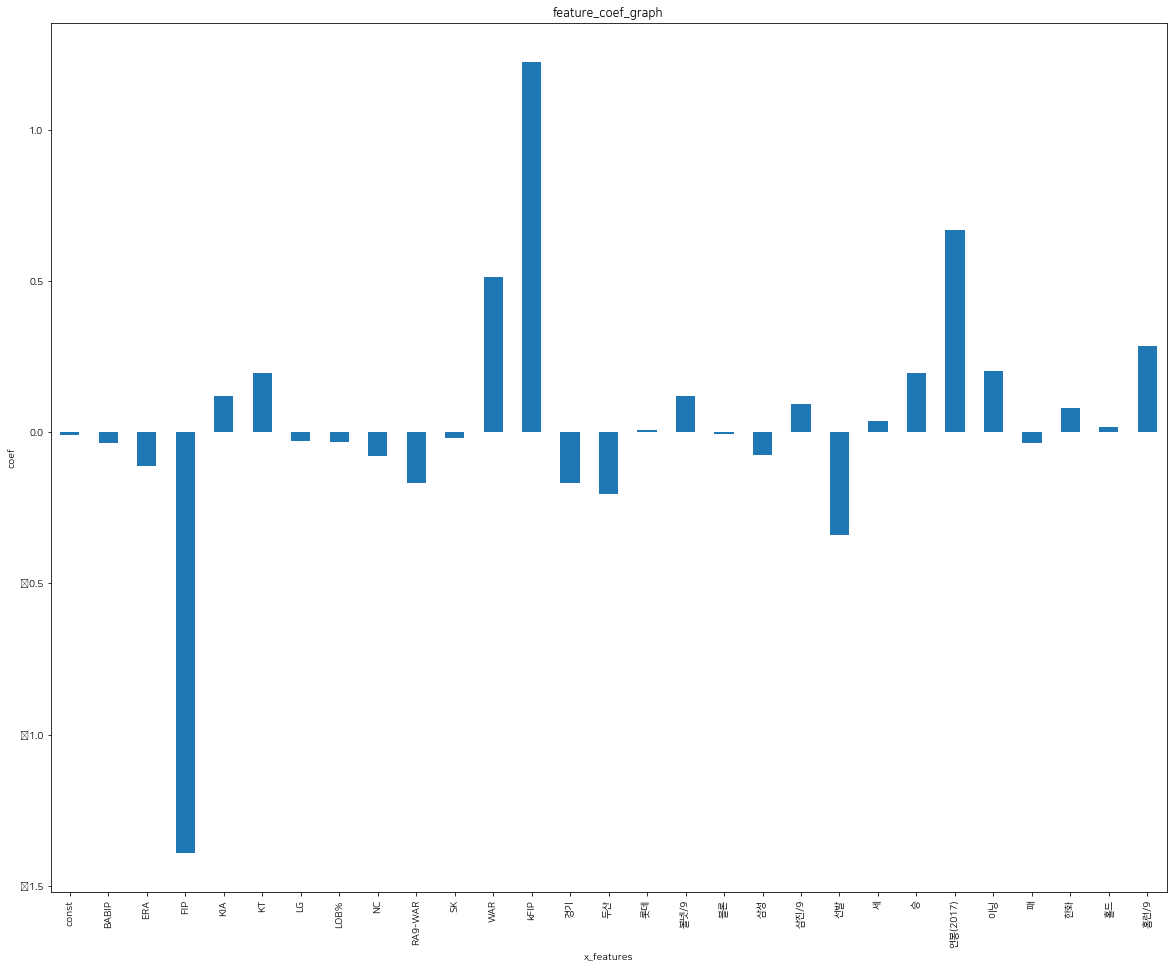

In [76]:
plt.rc('font', family='NanumSquareRound') # 컴퓨터에 Malgun Gothic가 없어 있는 폰트 사용.
plt.rcParams['figure.figsize'] = [20, 16]

coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

x_labels = model.params.index.tolist()

ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

/Users/kimha-eun/opt/anaconda3/envs/ENVIRONMENT/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kimha-eun/opt/anaconda3/envs/ENVIRONMENT/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


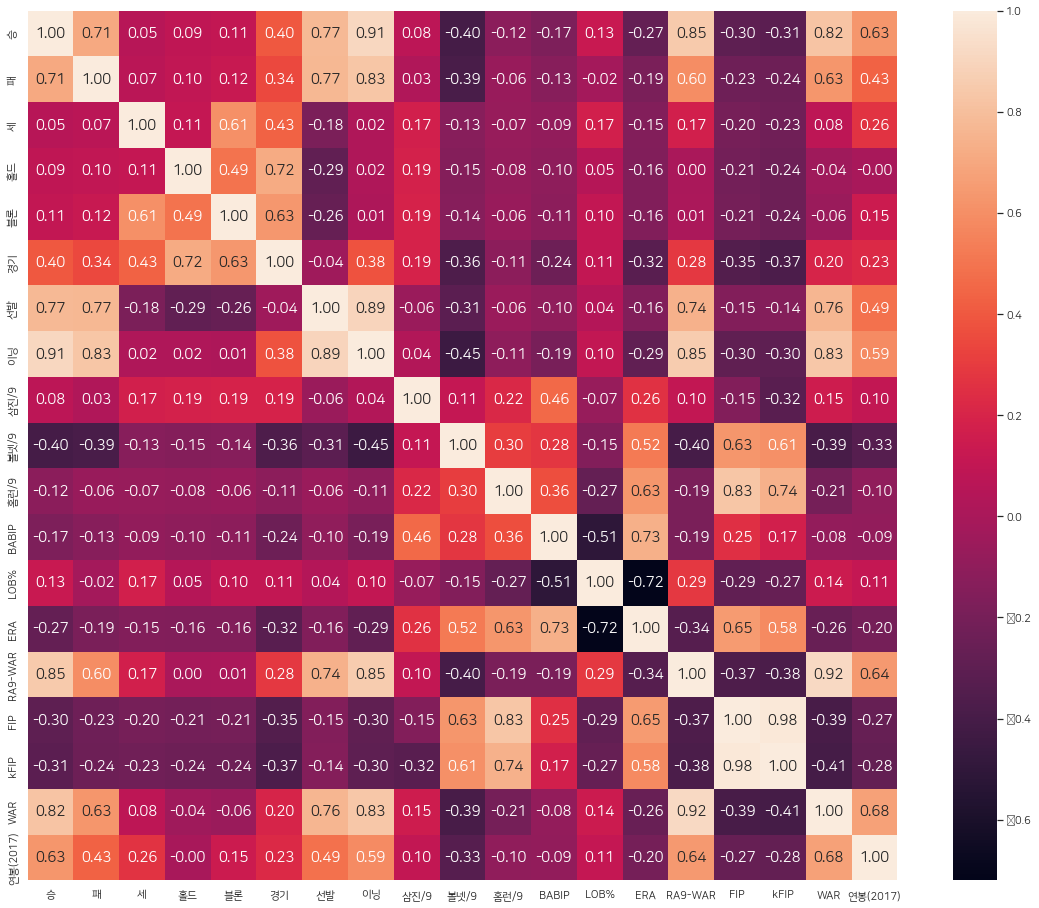

In [80]:
import seaborn as sns

corr = picher_df[scale_columns].corr(method='pearson')
show_cols = picher_df[scale_columns].columns.to_list()

sns.set(font = 'NanumSquareRound') # 컴퓨터에 Malgun Gothic가 없어 있는 폰트 사용.
hm = sns.heatmap(corr.values,
                cbar = True,
                annot = True,
                square = True,
                fmt = '.2f',
                annot_kws={'size': 15},
                yticklabels = show_cols,
                xticklabels = show_cols)

plt.show()

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif.round(1)

,Features,VIF
0,BABIP,3.2
1,ERA,10.6
2,FIP,14238.3
3,KIA,1.1
4,KT,1.1
5,LG,1.1
6,LOB%,4.3
7,NC,1.1
8,RA9-WAR,13.6
9,SK,1.1


In [84]:
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

lr = LinearRegression()
model = lr.fit(X_train, y_train)

print('acc=')
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

print('rmse=')
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions)))
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

acc=
0.9150591192570362
0.9038759653889865
rmse=
7893.462873347694
13141.866063591082


,VIF Factor,features
0,1.9,FIP
1,2.1,WAR
2,1.9,볼넷/9
3,1.1,삼진/9
4,1.9,연봉(2017)


In [88]:
picher = pd.read_csv(picher_file_path)
result_df = picher[['선수명', '연봉(2017)', '연봉(2018)']]
result_df['예측연봉(2018)'] = pd.Series(lr.predict(X)).astype('int64')
result_df = result_df.sort_values(by=['연봉(2018)'], ascending = False)
result_df.columns = ['선수명', '작년연봉(2017)', '실제연봉(2018)', '예측연봉(2018)']
result_df = result_df[result_df['작년연봉(2017)'] != result_df['실제연봉(2018)']]
result_df.shape    #24 연봉 동결.
result_df.head(10)

,선수명,작년연봉(2017),실제연봉(2018),예측연봉(2018)
2,양현종,150000,230000,163930
0,켈리,85000,140000,120122
1,소사,50000,120000,88127
4,레일리,85000,111000,102253
5,피어밴드,35000,85000,58975
23,배영수,55000,50000,56873
40,안영명,20000,35000,22420
67,채병용,25000,30000,21178
16,류제국,35000,29000,45122
55,박정진,33000,25000,29060


<AxesSubplot:xlabel='선수명'>

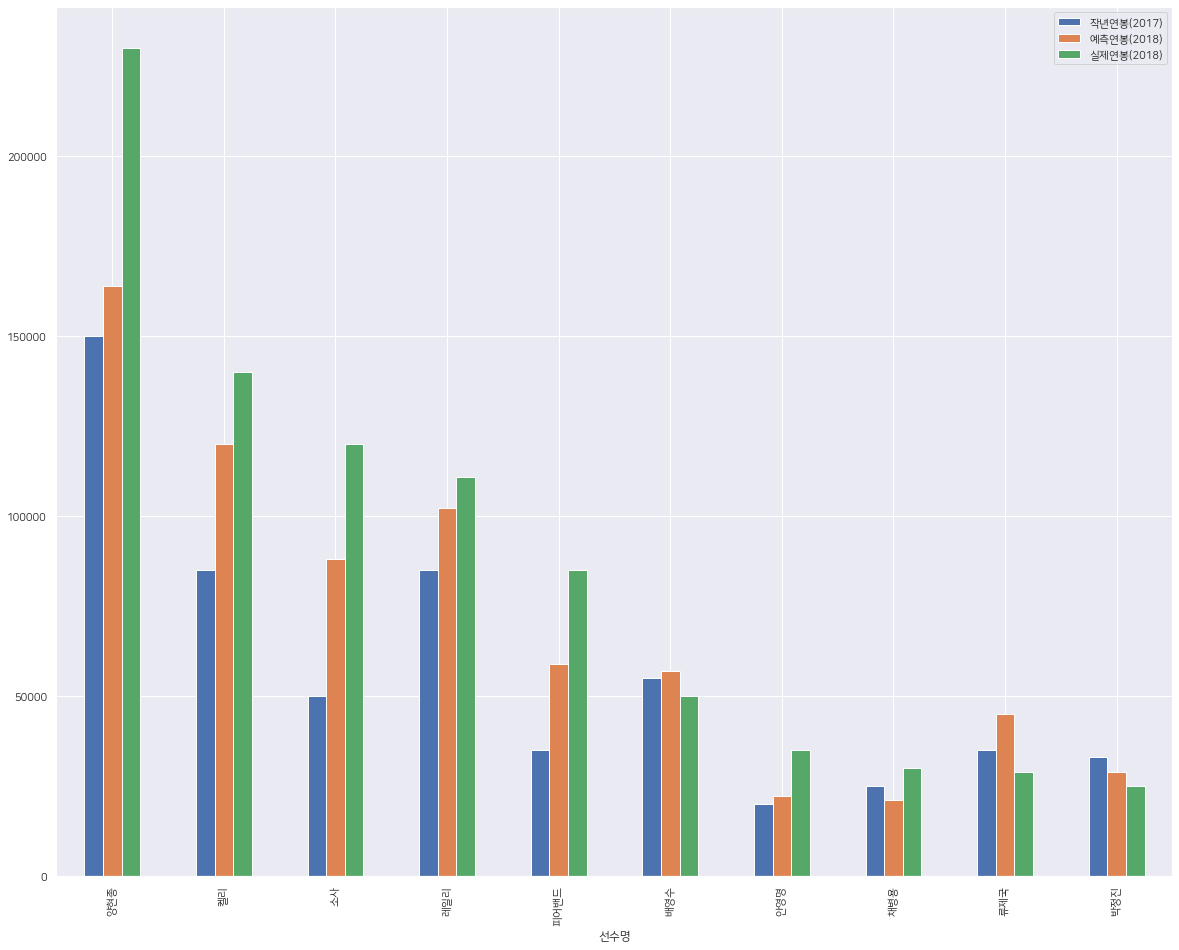

In [89]:
result_df = result_df.head(10)
plt.rc('font', family = 'NanumSquareRound') # 컴퓨터에 Malgun Gothic가 없어 있는 폰트 사용.
result_df.plot(x = '선수명', y = ['작년연봉(2017)', '예측연봉(2018)', '실제연봉(2018)'], kind='bar')